In [3]:
import pandas as pd

In [6]:
data = pd.read_csv('data/train.csv')

In [7]:
data

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression


In [11]:
import seaborn as sns

In [22]:
labels = pd.DataFrame(data['label'].value_counts())
labels['count'] = labels['label']
labels.label = labels.index
labels

,label,count
Depression,Depression,352
Alcohol,Alcohol,140
Suicide,Suicide,66
Drugs,Drugs,58


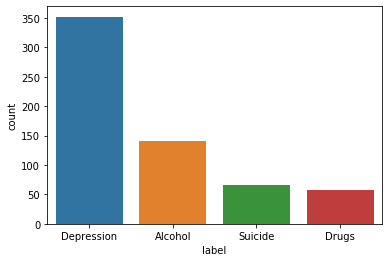

In [23]:
sns.barplot(x="label", y="count", data=labels)

In [32]:
labels['occupancy'] = labels['count']/labels['count'].sum()
labels

,label,count,occupancy
Depression,Depression,352,0.571429
Alcohol,Alcohol,140,0.227273
Suicide,Suicide,66,0.107143
Drugs,Drugs,58,0.094156


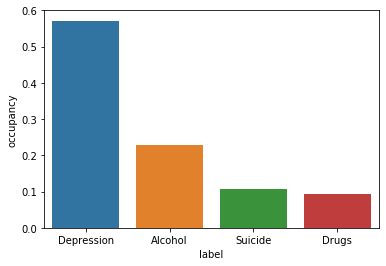

In [33]:
sns.barplot(x="label", y="occupancy", data=labels)

In [56]:
train = data[:400]
test = data[400:]

In [74]:
dep = train.loc[data['label'] == 'Depression']
alc = train.loc[data['label'] == 'Alcohol']
sui = train.loc[data['label'] == 'Suicide']
drug =train.loc[data['label'] == 'Drugs']

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
dep_corpus = CountVectorizer()
alc_corpus =  CountVectorizer()
sui_corpus =  CountVectorizer()
drug_corpus =  CountVectorizer()

In [141]:
a = dep_corpus.fit_transform(dep['text'])
b = alc_corpus.fit_transform(alc['text'])
c = sui_corpus.fit_transform(sui['text'])
d = drug_corpus.fit_transform(drug['text'])

In [119]:
import nltk

In [121]:
from nltk.corpus import stopwords

In [142]:
dep_list = dep_corpus.get_feature_names()
alc_list = alc_corpus.get_feature_names()
sui_list = sui_corpus.get_feature_names()
drug_list = drug_corpus.get_feature_names()

In [143]:
#corpus
dep_no_stop = []
alc_no_stop = []
sui_no_stop = []
drug_no_stop = []

for report in dep_list:
    if not report in stopwords.words('english'):
        dep_no_stop.append(report)
for report in alc_list:
    if not report in stopwords.words('english'):
        alc_no_stop.append(report)
for report in sui_list:
    if not report in stopwords.words('english'):
        sui_no_stop.append(report)
for report in drug_list:
    if not report in stopwords.words('english'):
        drug_no_stop.append(report)

In [159]:
# documents: Depression, Suicidal, Alcoholic, Drug
# term frequency: term frequency in each document

126

### Text Cleaning

In [169]:
from nltk.tokenize import word_tokenize
tokenized_reports = [word_tokenize(report) for report in data['text']]

In [170]:
tokenized_reports

[['I', 'feel', 'that', 'it', 'was', 'better', 'I', 'dieAm', 'happy'],
 ['Why', 'do', 'I', 'get', 'hallucinations', '?'],
 ['I',
  'am',
  'stresseed',
  'due',
  'to',
  'lack',
  'of',
  'financial',
  'support',
  'in',
  'school'],
 ['Why', 'is', 'life', 'important', '?'],
 ['How',
  'could',
  'I',
  'be',
  'helped',
  'to',
  'go',
  'through',
  'the',
  'depression',
  '?'],
 ['What', 'are', 'the', 'effects', 'of', 'depression', 'to', 'ones', 'health'],
 ['Why',
  'is',
  'everything',
  'so',
  'hard',
  'to',
  'deal',
  'with',
  'in',
  'this',
  'life'],
 ['I', 'feel', 'emotionally', 'overwhelmed'],
 ['How', 'to', 'manage', 'taking', 'alcohol', '?'],
 ['Is', 'heaven', 'open', 'for', 'us', 'who', 'smoke', 'bhang', '?'],
 ['How', 'to', 'survive', 'without', 'money', '?'],
 ['How',
  'do',
  'i',
  'stop',
  'this',
  '?',
  'What',
  'do',
  'I',
  'do',
  'when',
  'life',
  'becomes',
  'unbearable',
  '?'],
 ['I',
  'was',
  'ever',
  'sad',
  ',',
  'alone',
  'and',
  '

In [174]:
import re
import string

In [175]:
regex = re.compile('[%s]' % re.escape(string.punctuation)) 

In [176]:
no_punc = []
for texts in tokenized_reports:
    new_review = []
    #print(review)
    for token in texts:
        new_token = regex.sub(u'', token)
        #print(new_token)
        if not new_token == u'':
            new_review.append(new_token)
            #print(new_token)
    no_punc.append(new_review)
no_punc

[['I', 'feel', 'that', 'it', 'was', 'better', 'I', 'dieAm', 'happy'],
 ['Why', 'do', 'I', 'get', 'hallucinations'],
 ['I',
  'am',
  'stresseed',
  'due',
  'to',
  'lack',
  'of',
  'financial',
  'support',
  'in',
  'school'],
 ['Why', 'is', 'life', 'important'],
 ['How',
  'could',
  'I',
  'be',
  'helped',
  'to',
  'go',
  'through',
  'the',
  'depression'],
 ['What', 'are', 'the', 'effects', 'of', 'depression', 'to', 'ones', 'health'],
 ['Why',
  'is',
  'everything',
  'so',
  'hard',
  'to',
  'deal',
  'with',
  'in',
  'this',
  'life'],
 ['I', 'feel', 'emotionally', 'overwhelmed'],
 ['How', 'to', 'manage', 'taking', 'alcohol'],
 ['Is', 'heaven', 'open', 'for', 'us', 'who', 'smoke', 'bhang'],
 ['How', 'to', 'survive', 'without', 'money'],
 ['How',
  'do',
  'i',
  'stop',
  'this',
  'What',
  'do',
  'I',
  'do',
  'when',
  'life',
  'becomes',
  'unbearable'],
 ['I',
  'was',
  'ever',
  'sad',
  'alone',
  'and',
  'always',
  'on',
  'drugsNow',
  'I',
  'know',
  'ho

In [193]:
#no stopwords
cleaner = []
for report in no_punc:
    new_term_vector = []
    for word in report:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    cleaner.append(' '.join(new_term_vector))
cleaner = pd.DataFrame(cleaner)

In [195]:
cleaner

,0
0,I feel better I dieAm happy
1,Why I get hallucinations
2,I stresseed due lack financial support school
3,Why life important
4,How could I helped go depression
...,...
611,What I stop alcoholism
612,How become oldself
613,How someone stop
614,I feel unworthy


### Modeling

In [197]:
#Vectorize
Vect = CountVectorizer()
vector = Vect.fit_transform(cleaner[0])

#find tfidf
tfidf = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(vector)

In [198]:
tfidf_vector

<616x767 sparse matrix of type '<class 'numpy.float64'>'
	with 2526 stored elements in Compressed Sparse Row format>

In [221]:
from sklearn.calibration import CalibratedClassifierCV

In [222]:
C = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accu = []
for i in C:
    clf = LinearSVC(C = i)
    model = CalibratedClassifierCV(clf) 
    a = model.fit(tfidf_vector, data['label'])
    predict = model.predict(tfidf_vector)
    training_error = metrics.accuracy_score(predict,data['label'])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [207]:
test = pd.read_csv('data/Test.csv')
test

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?
...,...,...
304,Z9A6ACLK,Yes
305,ZDUOIGKN,My girlfriend dumped me
306,ZHQ60CCH,How can I go back to being my old self?
307,ZVIJMA4O,Is it true bhang is medicinal?


In [209]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score

In [213]:
text_vec = Vect.transform(test['text'])
test_idf_vector = tfidf.fit_transform(text_vec)

In [223]:
model.predict(test_idf_vector)

array(['Depression', 'Depression', 'Depression', 'Depression', 'Drugs',
       'Depression', 'Depression', 'Depression', 'Alcohol', 'Alcohol',
       'Depression', 'Alcohol', 'Depression', 'Alcohol', 'Alcohol',
       'Depression', 'Depression', 'Drugs', 'Depression', 'Suicide',
       'Depression', 'Depression', 'Alcohol', 'Depression', 'Suicide',
       'Depression', 'Depression', 'Alcohol', 'Depression', 'Alcohol',
       'Depression', 'Depression', 'Depression', 'Depression',
       'Depression', 'Drugs', 'Depression', 'Suicide', 'Depression',
       'Drugs', 'Depression', 'Depression', 'Alcohol', 'Depression',
       'Alcohol', 'Depression', 'Depression', 'Depression', 'Depression',
       'Depression', 'Depression', 'Depression', 'Depression',
       'Depression', 'Alcohol', 'Depression', 'Alcohol', 'Suicide',
       'Alcohol', 'Alcohol', 'Alcohol', 'Alcohol', 'Depression',
       'Depression', 'Depression', 'Depression', 'Depression',
       'Depression', 'Suicide', 'Depression'

In [230]:
data.label.value_counts()

Depression    352
Alcohol       140
Suicide        66
Drugs          58
Name: label, dtype: int64

In [226]:
res = model.predict_proba(test_idf_vector)

In [235]:
res = pd.DataFrame(res)
res.columns = ['Depression','Alcohol','Suicide','Drugs']
res.index = test['ID']